In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')

## Data Overview

In [16]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [17]:
df.tail()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2
3182,Unassigned,2024050307,0,1,0,0,0,2,0,2


In [18]:
len(df)

3183

In [19]:
df.shape

(3183, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [21]:
df.columns

Index(['# ----------------------------------------', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [23]:
df.index

RangeIndex(start=0, stop=3183, step=1)

## Data Cleaning

In [24]:
df.columns = df.iloc[0]  # iloc = location of the row
df = df.drop(index=0).reset_index(drop = True)
df.columns = ["Channel Group", "DateHour", "Users", "Sessions", "Engaged Sessions", "Average engagement time per session", "Engaged sessions per user",	"Events per session", "Engagement rate", "Event count"]

In [25]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [26]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors ='coerce')

In [29]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged Sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [30]:
numeric_cols = df.columns.drop(["Channel Group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors ='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
dtypes: datetime6

In [32]:
df["Hour"] = df["DateHour"].dt.hour

In [33]:
df.columns

Index(['Channel Group', 'DateHour', 'Users', 'Sessions', 'Engaged Sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count', 'Hour'],
      dtype='object')

In [35]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


## EDA

### What patterns or trends can you observe in website sessions and users over time?

<function matplotlib.pyplot.show(close=None, block=None)>

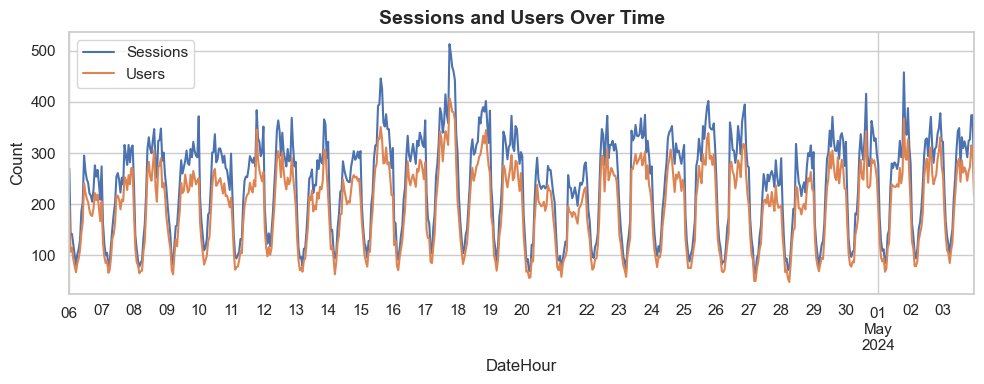

In [53]:
plt.figure(figsize=(10, 4))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
sns.set(style="whitegrid")
plt.title("Sessions and Users Over Time", fontsize=14, fontweight='bold')
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.tight_layout()
plt.show

### Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

<function matplotlib.pyplot.show(close=None, block=None)>

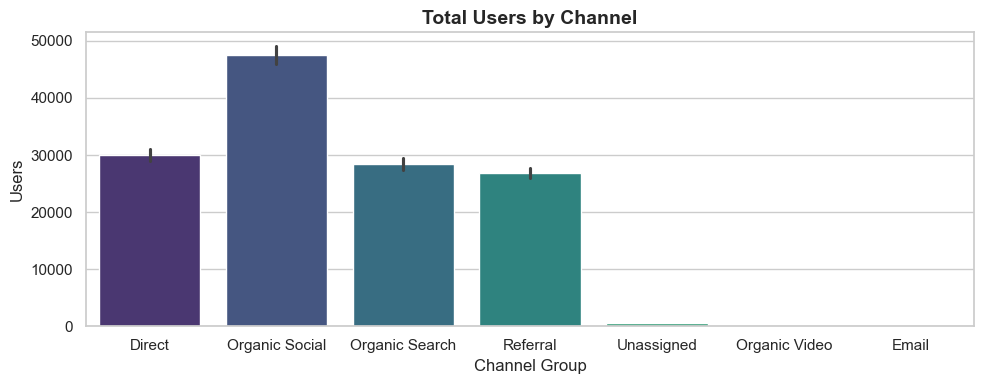

In [54]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="viridis")
plt.title("Total Users by Channel", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show

### Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

<function matplotlib.pyplot.show(close=None, block=None)>

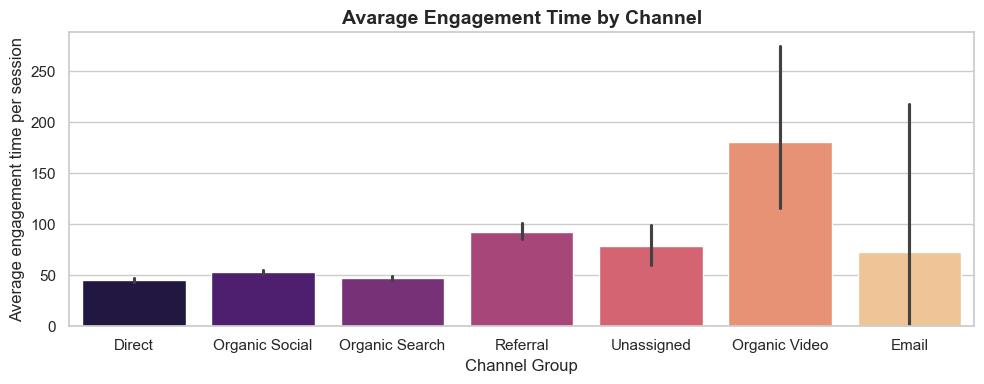

In [52]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="Channel Group", y="Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Avarage Engagement Time by Channel", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show

### How does engagement rate vary across different traffic channels?

<function matplotlib.pyplot.show(close=None, block=None)>

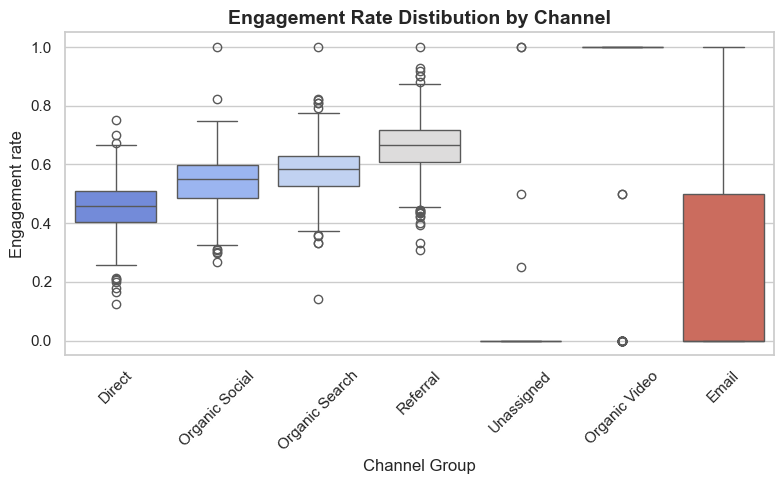

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement Rate Distibution by Channel", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

### Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

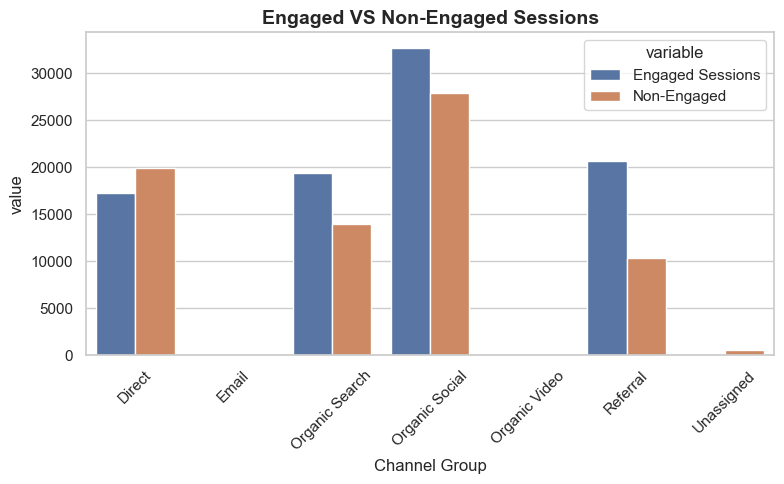

In [61]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars="Channel Group", value_vars=["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="Channel Group", y="value", hue="variable")
plt.title("Engaged VS Non-Engaged Sessions", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### At what hours of the day does each channel drive the most traffic?

<function matplotlib.pyplot.show(close=None, block=None)>

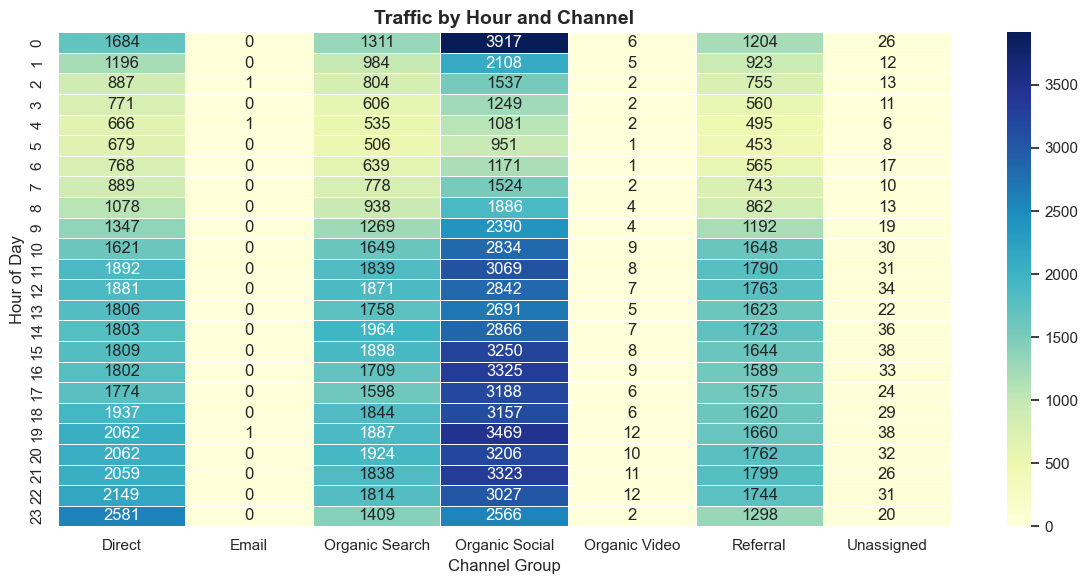

In [63]:
heatmap_data = df.groupby(["Hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel", fontsize=14, fontweight='bold')
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show

### Is there any correlation between high traffic (sessions) and high engagement rate over time?

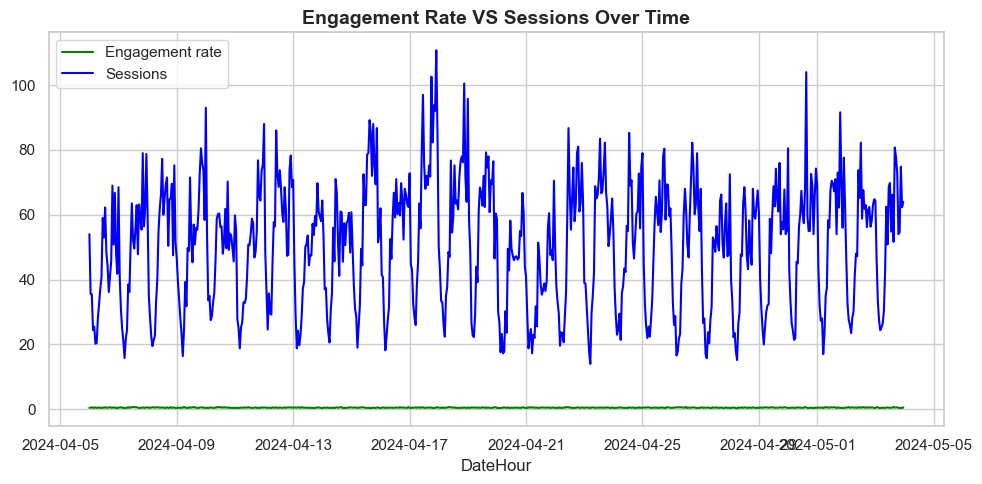

In [66]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate VS Sessions Over Time", fontsize=14, fontweight='bold')
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
df.info

<bound method DataFrame.info of              # ----------------------------------------  \
0     Session primary channel group (Default channel...   
1                                                Direct   
2                                        Organic Social   
3                                                Direct   
4                                        Organic Social   
...                                                 ...   
3178                                         Unassigned   
3179                                         Unassigned   
3180                                         Unassigned   
3181                                         Unassigned   
3182                                         Unassigned   

                    Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0     Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                   2024041623        237        300               144   
2                   2024041719       